<a href="https://colab.research.google.com/github/Milad-Khanchi/ENCS6181/blob/main/Extra_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

Download Dataset:

In [4]:
data = pd.read_excel('https://github.com/Milad-Khanchi/ENCS6181/raw/main/data_akbilgic.xlsx')
data = pd.DataFrame(data)
data

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...,...
531,2011-02-16,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
532,2011-02-17,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
533,2011-02-18,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
534,2011-02-21,-0.013069,-0.013706,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


#Split the dataset into trainset and testset:
(Using Jan 2009 to Oct 2010 for trainset and Nov 2010 to Feb 2011 for testset)

(458 instances for trainset and 78 instances for testset)

In [5]:
trainset = data.drop(data.index[458:])
trainset = trainset.drop('date', axis = 1)
trainset

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...
453,0.015532,0.022096,0.001772,0.013164,0.005049,-0.000546,-0.010753,0.008505,0.004985
454,0.007868,0.001796,0.002386,-0.000782,-0.002870,0.005343,-0.001753,-0.002511,0.000089
455,-0.001169,0.008521,0.002145,0.005039,0.001845,-0.002714,0.000719,0.002497,0.006881
456,-0.002500,-0.006402,0.000017,-0.003835,-0.007802,-0.002533,0.016534,-0.006240,0.002830


In [6]:
testset = data.drop(data.index[0:458])
testset = testset.reset_index(drop=True)
testset = testset.drop('date', axis = 1)
testset

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.007058,0.014433,0.001631,0.005596,0.008571,-0.025059,0.013959,0.004240,0.014254
1,-0.008025,-0.001307,0.007729,0.007459,0.010968,0.000574,0.004796,0.007955,0.000466
2,0.001202,0.007039,0.003671,-0.005502,-0.001460,0.021471,0.000000,-0.005426,0.005992
3,0.032986,0.042670,0.019099,0.017509,0.019601,0.000000,0.015059,0.016419,0.010737
4,-0.001782,-0.004374,0.003915,0.002893,0.002147,0.028152,-0.005343,-0.001128,0.004166
...,...,...,...,...,...,...,...,...,...
73,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
74,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
75,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
76,-0.013069,-0.013706,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


##Normalized Data:

In [7]:
from sklearn import preprocessing

Two ways of normalization:

In [8]:
scaler = preprocessing.StandardScaler().fit(trainset.loc[:, ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']].to_numpy())

In [9]:
# scaler = preprocessing.Normalizer().fit(trainset.loc[:, ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']].to_numpy())

Use method:

In [10]:
normalized_trainset = scaler.transform(trainset.loc[:, ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']].to_numpy())
normalized_trainset = pd.DataFrame(normalized_trainset, columns = ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'])


In [11]:
normalized_testset = scaler.transform(testset.loc[:, ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']].to_numpy())
normalized_testset = pd.DataFrame(normalized_testset, columns = ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'])


In [12]:
x_train1 = normalized_trainset.loc[:, ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']]
x_train1 = x_train1.to_numpy()

x_test1 = normalized_testset.loc[:, ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']]
x_test1 = x_test1.to_numpy()

y_train1 = trainset.loc[:, ['ISE', 'ISE.1']]
y_train1 = y_train1.to_numpy()

y_test1 = testset.loc[:, ['ISE', 'ISE.1']]
y_test1 = y_test1.to_numpy()


#"Least-squares (Regression)"

In [13]:
# Import packages.
import cvxpy as cp
import numpy as np

In [14]:
A = x_train1

#add bias
N = A.shape[0]
A = np.column_stack([A,np.ones(N)])

print(A.shape)

b = y_train1
print(b.shape)

(458, 8)
(458, 2)


In [15]:
# Define and solve the CVXPY problem.
x = cp.Variable([A.shape[1],b.shape[1]])
cost = cp.sum_squares(A @ x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is")
print(x.value)
print("The norm of the residual is ", (cp.pnorm(A @ x - b, p=2).value)**2)


The optimal value is 0.15238218525504046
The optimal x is
[[ 0.00044671  0.00125141]
 [-0.00118515 -0.00260174]
 [-0.00213809 -0.00462184]
 [-0.0007419   0.0008941 ]
 [-0.00182436 -0.00440192]
 [ 0.01083391  0.01570291]
 [ 0.00605396  0.01084702]
 [ 0.00203511  0.0021815 ]]
The norm of the residual is  0.15238218525504044


Predict trainset to calculate mean of predicted values:

In [16]:
yh = np.dot(A,x.value)

Show Predicted ($\hat{Y}_2$) and real value ($Y_2$):

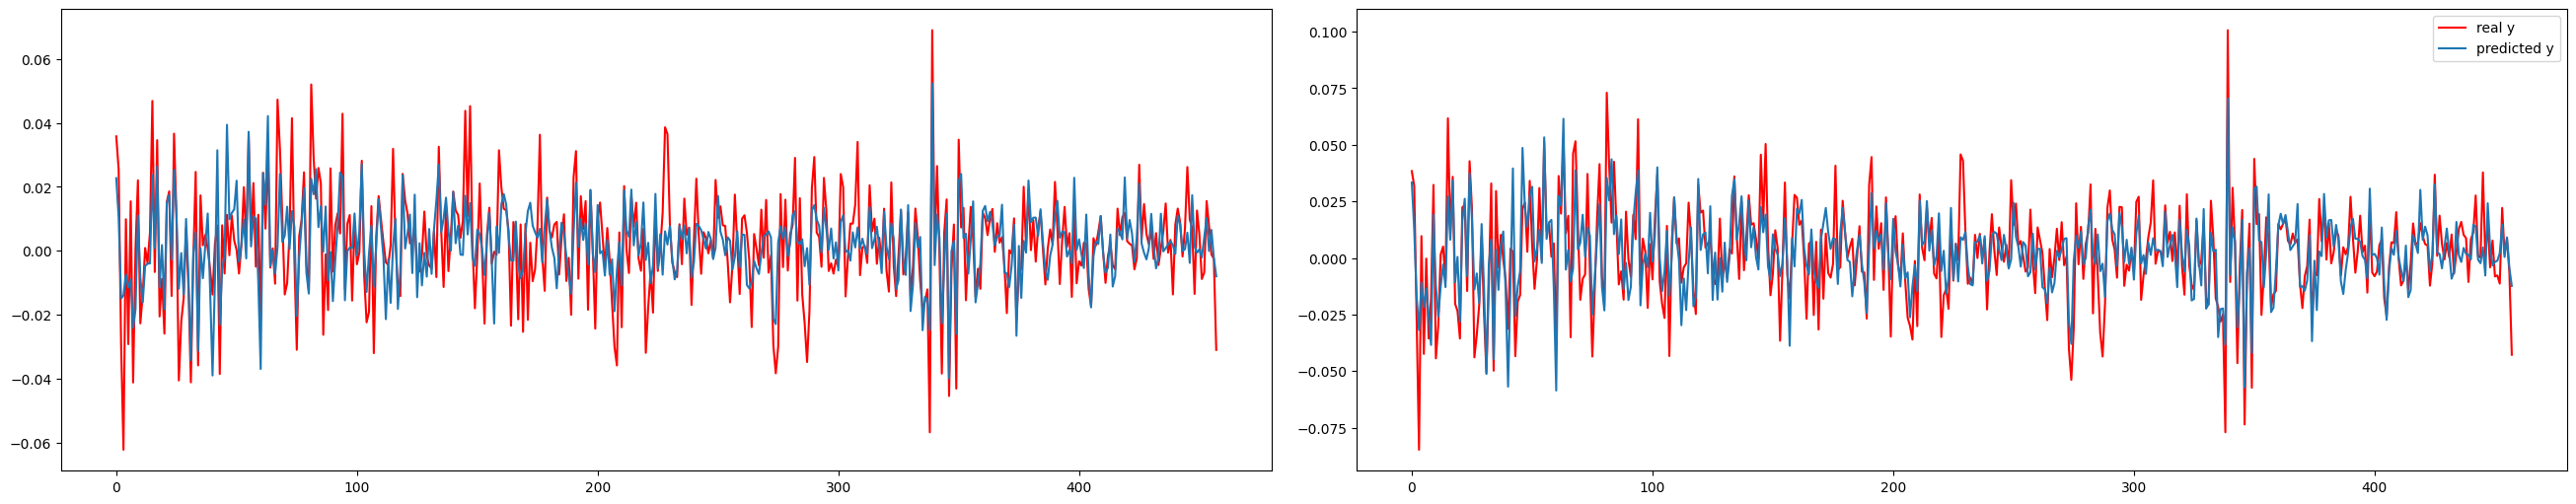

In [17]:
figure, axes = plt.subplots(ncols = 2, nrows = 1, constrained_layout=True, figsize=(26, 5))
axes[0].plot(y_train1[:,0], label = 'real y', color = 'r')
axes[0].plot(yh[:,0], label = 'predicted y')
axes[1].plot(y_train1[:,1], label = 'real y', color = 'r')
axes[1].plot(yh[:,1], label = 'predicted y')
plt.legend()
plt.show()

Use weights for predicting testset:

In [18]:
#Add bias to testset
A1 = x_test1
N = A1.shape[0]
A1 = np.column_stack([A1,np.ones(N)])

In [19]:
yh = np.dot(A1,x.value)
print("The norm of the residual is ", (cp.pnorm(A1 @ x - y_test1, p=2).value)**2)

The norm of the residual is  0.022542473727662472


Show Predicted ($\hat{Y}_2$) and real value ($Y_2$):

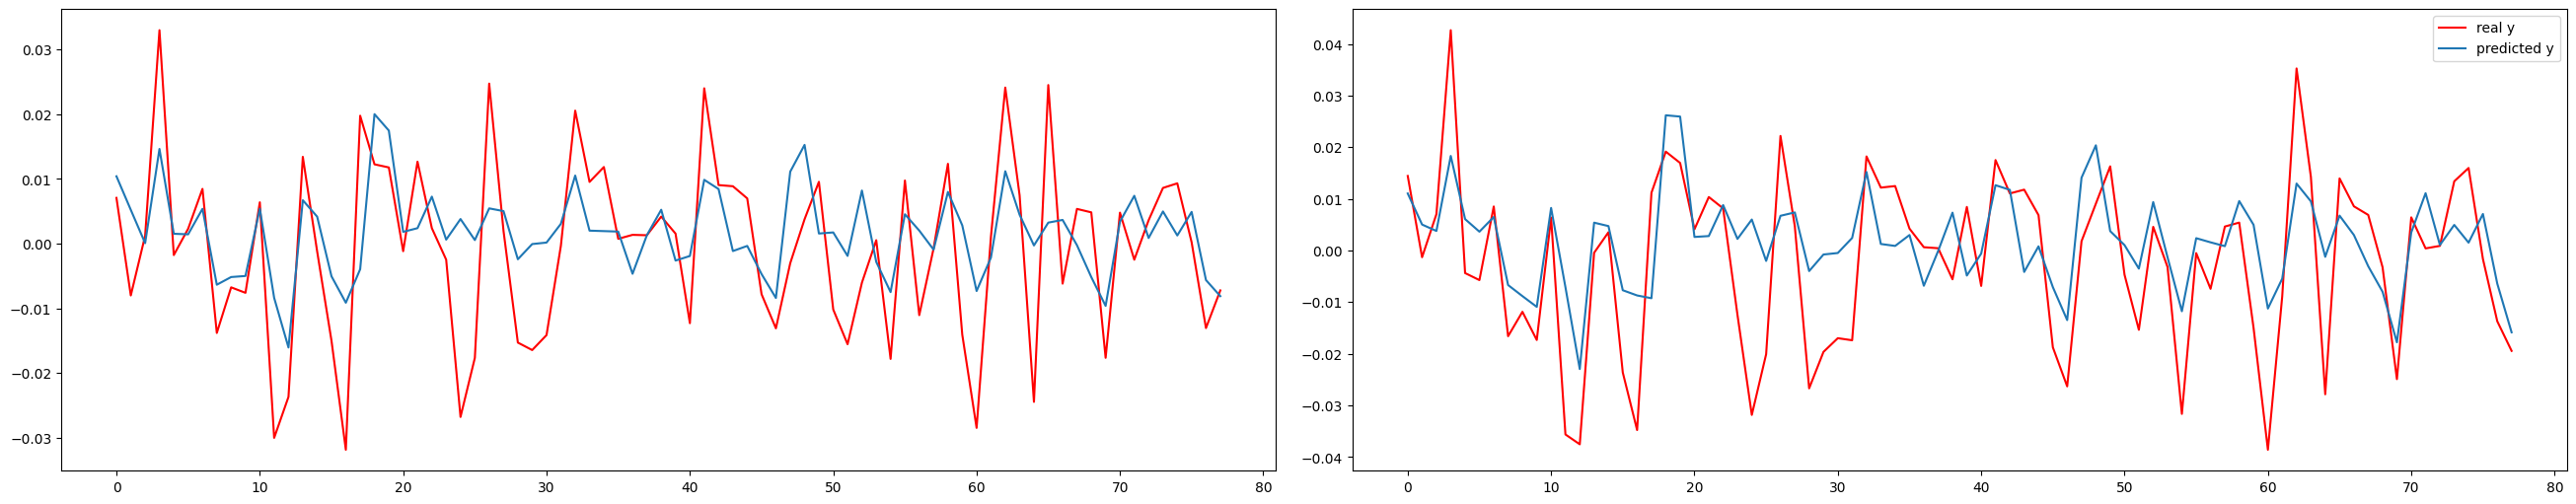

In [20]:
figure, axes = plt.subplots(ncols = 2, nrows = 1, constrained_layout=True, figsize=(26, 5))
axes[0].plot(y_test1[:,0], label = 'real y', color = 'r')
axes[0].plot(yh[:,0], label = 'predicted y')
axes[1].plot(y_test1[:,1], label = 'real y', color = 'r')
axes[1].plot(yh[:,1], label = 'predicted y')
plt.legend()
plt.show()

In [21]:
from google.colab import files

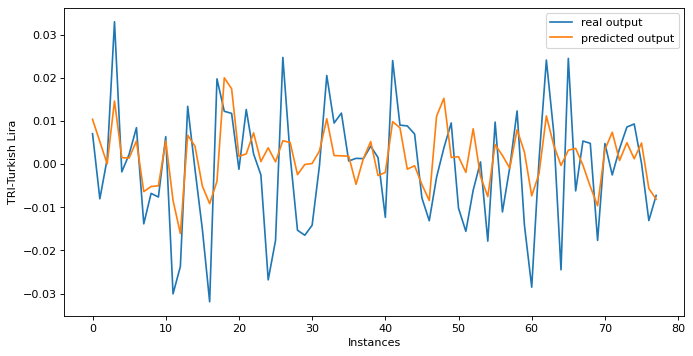

In [22]:
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(range(0,78), y_test1[:,0], label='real output')
plt.plot(range(0,78), yh[:,0], label='predicted output')
plt.legend(loc='upper right')
plt.xlabel('Instances')
plt.ylabel('TRI-Turkish Lira')
plt.savefig('TRI', format='pdf', bbox_inches='tight')
# files.download('TRI.pdf')
plt.show()

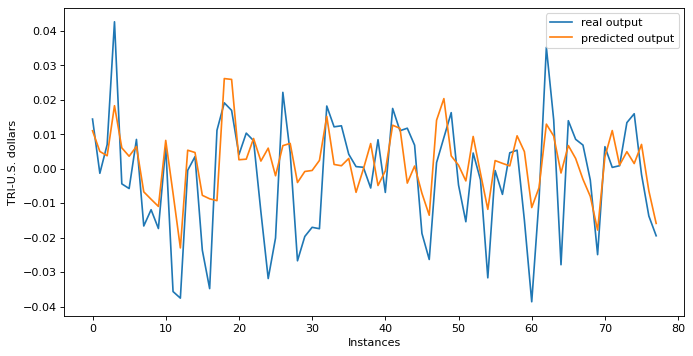

In [23]:
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(range(0,78), y_test1[:,1], label='real output')
plt.plot(range(0,78), yh[:,1], label='predicted output')
plt.legend(loc='upper right')
plt.xlabel('Instances')
plt.ylabel('TRI-U.S. dollars')
plt.savefig('TRI-U.S. dollars', format='pdf', bbox_inches='tight')
# files.download('TRI.pdf')
plt.show()

##Use previous data to predict todays Total return index:

(only data of two days before)

The LS model:

In [24]:
A = x_train1
A = np.delete(A,-1,0)
B = np.delete(A,-1,0)

m,n = A.shape
A = np.append(np.zeros([1,n]), A, axis = 0)

m,n = B.shape
B = np.append(np.zeros([1,n]), B, axis = 0)
B = np.append(np.zeros([1,n]), B, axis = 0)

A = np.concatenate((x_train1, A, B), axis = 1)

#add bias
N = A.shape[0]
A = np.column_stack([A,np.ones(N)])

print(A.shape)

b = y_train1
print(b.shape)

(458, 22)
(458, 2)


In [25]:
# Define and solve the CVXPY problem.
x = cp.Variable([A.shape[1],b.shape[1]])
cost = cp.sum_squares(A @ x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is")
print(x.value)
print("The norm of the residual is ", (cp.pnorm(A @ x - b, p=2).value)**2)


The optimal value is 0.1424475937968082
The optimal x is
[[ 9.49471677e-04  2.22558406e-03]
 [-1.43383138e-03 -2.90255647e-03]
 [-2.43801818e-03 -5.10773546e-03]
 [-2.78599470e-04  2.79973838e-04]
 [-1.64553211e-03 -3.71764191e-03]
 [ 1.09017352e-02  1.53182476e-02]
 [ 5.66422401e-03  1.02436638e-02]
 [ 8.57204224e-05  2.13032067e-03]
 [ 1.04885444e-03  3.94228608e-04]
 [-1.88829837e-03 -2.62132092e-03]
 [ 7.68192373e-04 -2.25929359e-04]
 [ 2.21050859e-03  3.11301133e-03]
 [-9.85926840e-04 -1.25751632e-04]
 [-1.19348425e-03 -1.72032043e-03]
 [-1.03966070e-03 -1.05749607e-03]
 [-1.54627026e-04 -8.40284848e-04]
 [-1.90808167e-03 -2.70902157e-03]
 [ 1.04272633e-03  7.20102984e-04]
 [ 5.85143454e-04 -2.07477346e-04]
 [ 2.21217302e-03  3.60457826e-03]
 [-1.32044207e-03 -6.50470476e-04]
 [ 2.04536233e-03  2.19038532e-03]]
The norm of the residual is  0.1424475937968082


Use weights for predicting testset:

In [32]:
A1 = x_test1
A1 = np.delete(A1,-1,0)
B = np.delete(A1,-1,0)

m,n = A1.shape
A1 = np.append(np.zeros([1,n]), A1, axis = 0)

m,n = B.shape
B = np.append(np.zeros([1,n]), B, axis = 0)
B = np.append(np.zeros([1,n]), B, axis = 0)

A1 = np.concatenate((x_test1, A1, B), axis = 1)

#Add bias to testset
N = A1.shape[0]
A1 = np.column_stack([A1,np.ones(N)])

A1.shape

(78, 22)

In [33]:
y = y_test1
y.shape

(78, 2)

In [40]:
yh = np.dot(A1,x.value)
print("The norm of the residual is ", (cp.pnorm(A1 @ x - y_test1, p=2).value)**2)

The norm of the residual is  0.021761543158153367


Show Predicted ($\hat{Y}_2$) and real value ($Y_2$):

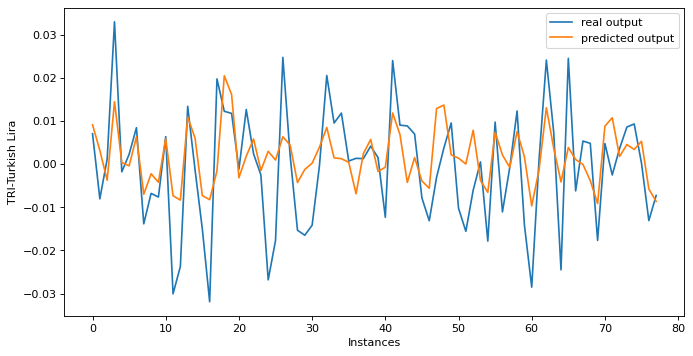

In [41]:
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(range(0,78), y_test1[:,0], label='real output')
plt.plot(range(0,78), yh[:,0], label='predicted output')
plt.legend(loc='upper right')
plt.xlabel('Instances')
plt.ylabel('TRI-Turkish Lira')
plt.savefig('TRInew', format='pdf', bbox_inches='tight')
# files.download('TRI.pdf')
plt.show()

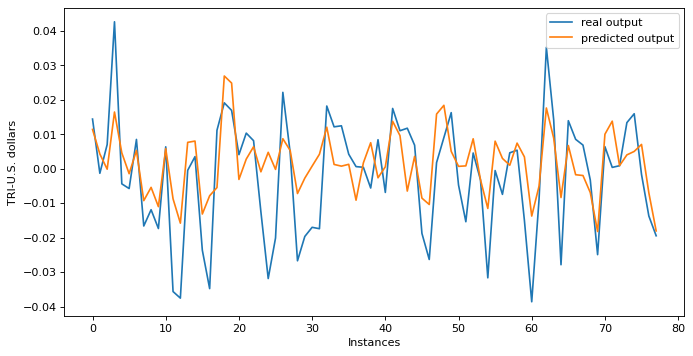

In [42]:
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(range(0,78), y_test1[:,1], label='real output')
plt.plot(range(0,78), yh[:,1], label='predicted output')
plt.legend(loc='upper right')
plt.xlabel('Instances')
plt.ylabel('TRI-U.S. dollars')
plt.savefig('TRI-U.S. dollarsnew', format='pdf', bbox_inches='tight')
# files.download('TRI.pdf')
plt.show()